## mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## loading data_set

In [ ]:
%cd /content/drive/MyDrive/Project/ANPR/

/content/drive/MyDrive/Project/ANPR
/content/drive/MyDrive/Project/ANPR


In [ ]:
#follow the link below to get your download code from from Roboflow
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")
!curl -L "https://public.roboflow.com/ds/K9IjAYLk5y?key=9th6uXdcDR" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

     |████████████████████████████████| 42 kB 841 kB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 67 kB 6.2 MB/s 
     |████████████████████████████████| 138 kB 36.9 MB/s 
     |████████████████████████████████| 178 kB 67.9 MB/s 
     |████████████████████████████████| 145 kB 69.4 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=roboflow-yolov5
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0    515      0  0:00:01  0:00:01 --:--:--   515
100 10.2M  100 10.2M    0     0  5009k      0  0:00:02  0:00:02 --:--:-- 5009k
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
replace data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: data.yaml               
   creating: 

## clone yolo github

In [ ]:
%cd /content/drive/MyDrive/Project/ANPR/

/content/drive/MyDrive/Project/ANPR


In [ ]:
# clone YOLOv5 repository from "https://github.com/ultralytics/yolov5"

!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14887, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 14887 (delta 0), reused 0 (delta 0), pack-reused 14882
Receiving objects: 100% (14887/14887), 13.92 MiB | 8.10 MiB/s, done.
Resolving deltas: 100% (10239/10239), done.


In [ ]:
# install pre-requisists
%cd /content/drive/MyDrive/Project/ANPR/yolov5

!pip install -r requirements.txt  

/content/drive/MyDrive/Project/ANPR/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 30.8 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 63.8 MB/s 


## training yolov5

In [ ]:
%cd /content/drive/MyDrive/Project/ANPR/yolov5

/content/drive/MyDrive/Project/ANPR/yolov5


In [ ]:
#start training
!python train.py --img 640 --batch 32 --epochs 1000 --data /content/drive/MyDrive/Project/ANPR/data-set/data.yaml --cfg yolov5m.yaml --weights '' --name model  --cache

Streaming output truncated to the last 5000 lines.
                   all         70        218    0.00423      0.199      0.003    0.00112

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      1/999      11.6G     0.1092    0.04406     0.0285        140        640: 100% 8/8 [00:06<00:00,  1.30it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:01<00:00,  1.05it/s]
                   all         70        218    0.00477      0.242    0.00405    0.00169

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      2/999      12.7G     0.1071     0.0441    0.02818        117        640: 100% 8/8 [00:06<00:00,  1.28it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:01<00:00,  1.29it/s]
                   all         70        218     0.0015      0.216      0.002   0.000635

      Epoch    GPU_mem   box_loss   obj_loss   cl

## model evaluvation

In [ ]:
%cd /content/drive/MyDrive/Project/ANPR/yolov5

/content/drive/MyDrive/Project/ANPR/yolov5


In [ ]:
# Start tensorboard
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
import matplotlib.pyplot as plt

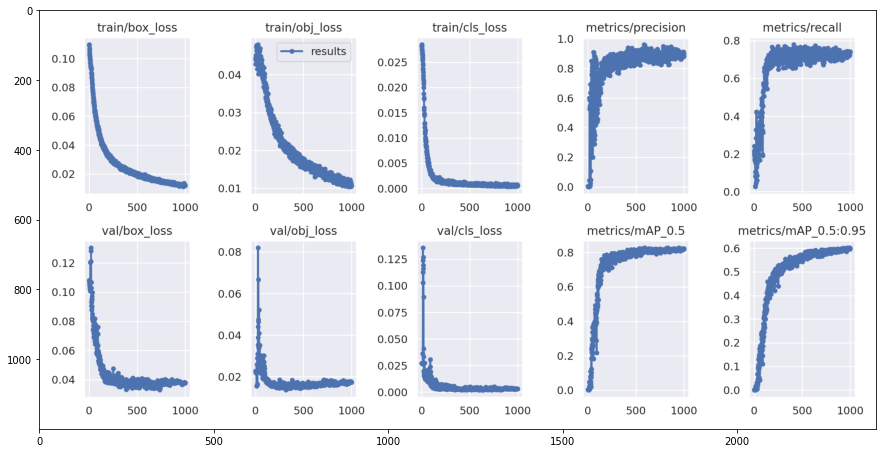

In [ ]:
img=plt.imread('/content/drive/MyDrive/Project/ANPR/yolov5/runs/train/model/results.png')
plt.figure(figsize=(15,15))
plt.imshow(img)

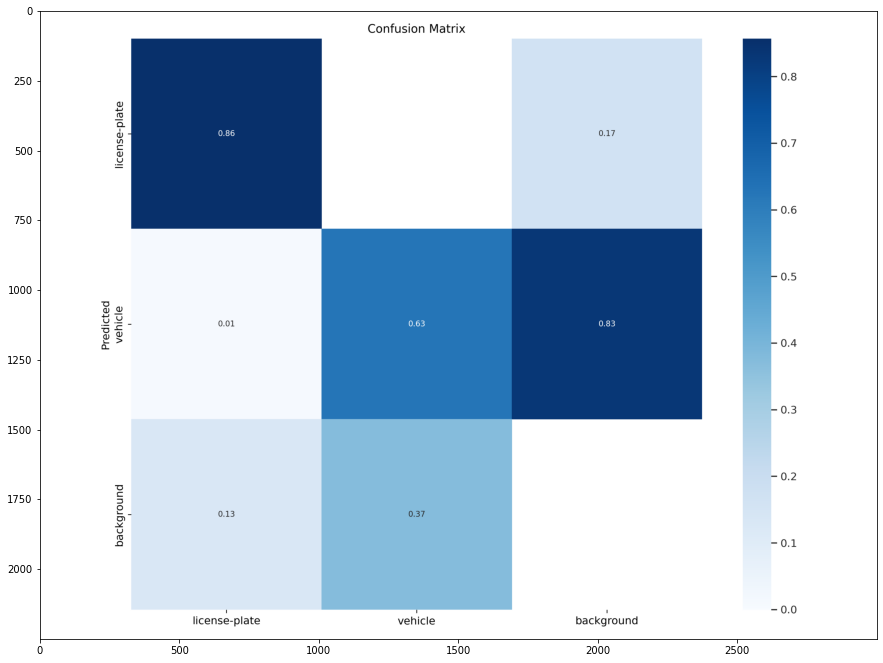

In [ ]:
img=plt.imread('/content/drive/MyDrive/Project/ANPR/yolov5/runs/train/model/confusion_matrix.png')
plt.figure(figsize=(15,15))
plt.imshow(img)

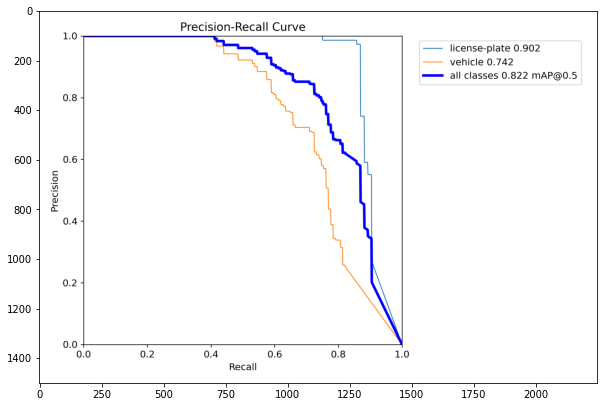

In [ ]:
img=plt.imread('/content/drive/MyDrive/Project/ANPR/yolov5/runs/train/model/PR_curve.png')
plt.figure(figsize=(10,10))
plt.imshow(img)

In [ ]:
# use the best weights!
%cd /content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/
!python detect.py --weights /content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/runs/train/model/weights/best.pt --img 416 --conf 0.4 --source /content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/data_images/test/images

/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5
detect: weights=['/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/runs/train/model/weights/best.pt'], source=/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/data_images/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients
image 1/35 /content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/data_images/test/images/b15d6c0bdf90226d_jpg.rf.775557ba6aaf7d76a8d4bb04f66d8fc5.

In [ ]:
#display result images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

## inference on training data

In [ ]:
detect= "/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/detect.py"

model= "/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/runs/train/model/weights/best.pt"

image= "/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/data_images/test/images/d27e094e98374ff8_jpg.rf.a0e0eba539117b97eb6433295c4cfb44.jpg"


In [ ]:
!python "/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/detect.py" --source "/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/data_images/test/images/d27e094e98374ff8_jpg.rf.a0e0eba539117b97eb6433295c4cfb44.jpg" --weights "/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/runs/train/model/weights/best.pt" --img 640 --conf 0.5 --save-txt

detect: weights=['/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/runs/train/model/weights/best.pt'], source=/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/data_images/test/images/d27e094e98374ff8_jpg.rf.a0e0eba539117b97eb6433295c4cfb44.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/data_images/test/images/d27e094e98374ff8_jpg.rf.a0e0eba539117b97eb6433295c4cfb4

## INFERENCE

In [2]:
import torch

model = torch.hub.load('/content/drive/MyDrive/Project/ANPR/yolov5', 'custom',path='/content/drive/MyDrive/Project/ANPR/yolov5/runs/train/model/weights/best.pt', force_reload=True,source='local') 

requirements: YOLOv5 requirements "gitpython" "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per /content/drive/MyDrive/Project/ANPR/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-49-g3c1afd9 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients
Adding AutoShape... 


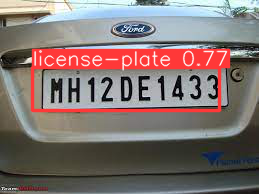

In [4]:
im = '/content/drive/MyDrive/Project/download (1).jfif'

results = model(im)  # inference

results.show()

In [ ]:
#results.xyxy[0]  # or .show(), .save(), .crop(), .pandas(), etc.
#results.pandas().xyxy[0]
# x=results.crop(save=True , save_dir='/content/drive/MyDrive/Project/automated_number_plate_detection/yolov5/runs/detect/exp5', )

In [5]:
x=results.crop()

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



In [6]:
x

[{'box': [tensor(32.87785, device='cuda:0'),
   tensor(67.37979, device='cuda:0'),
   tensor(219.73500, device='cuda:0'),
   tensor(110.27827, device='cuda:0')],
  'conf': tensor(0.77044, device='cuda:0'),
  'cls': tensor(0., device='cuda:0'),
  'label': 'license-plate 0.77',
  'im': array([[[201, 212, 216],
          [203, 214, 218],
          [204, 215, 219],
          ...,
          [ 56,  56, 255],
          [ 56,  56, 255],
          [ 56,  56, 255]],
  
         [[208, 217, 221],
          [204, 213, 217],
          [185, 194, 198],
          ...,
          [ 56,  56, 255],
          [ 56,  56, 255],
          [ 56,  56, 255]],
  
         [[135, 144, 148],
          [ 91, 100, 104],
          [ 66,  75,  79],
          ...,
          [ 56,  56, 255],
          [ 56,  56, 255],
          [ 56,  56, 255]],
  
         ...,
  
         [[118, 128, 116],
          [109, 123, 119],
          [108, 123, 125],
          ...,
          [ 81,  93,  95],
          [ 77,  93,  99],
       

In [ ]:
for i in x:
  for j in i:


In [7]:
x[0]['im']

array([[[201, 212, 216],
        [203, 214, 218],
        [204, 215, 219],
        ...,
        [ 56,  56, 255],
        [ 56,  56, 255],
        [ 56,  56, 255]],

       [[208, 217, 221],
        [204, 213, 217],
        [185, 194, 198],
        ...,
        [ 56,  56, 255],
        [ 56,  56, 255],
        [ 56,  56, 255]],

       [[135, 144, 148],
        [ 91, 100, 104],
        [ 66,  75,  79],
        ...,
        [ 56,  56, 255],
        [ 56,  56, 255],
        [ 56,  56, 255]],

       ...,

       [[118, 128, 116],
        [109, 123, 119],
        [108, 123, 125],
        ...,
        [ 81,  93,  95],
        [ 77,  93,  99],
        [ 77,  93,  99]],

       [[119, 129, 117],
        [112, 124, 118],
        [108, 123, 125],
        ...,
        [ 81,  93,  95],
        [ 77,  93,  99],
        [ 77,  93,  99]],

       [[121, 131, 119],
        [113, 125, 119],
        [110, 124, 123],
        ...,
        [ 81,  93,  95],
        [ 78,  92,  98],
        [ 78,  92,  98]]

In [8]:
from matplotlib import pyplot as plt

from PIL import Image

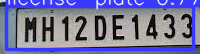

In [9]:
y=Image.fromarray(x[0]['im'])
y
#Image.fromarray(x[1]['im'], 'RGB')
#plt.imshow(x[1]['im'])
#plt.show()

## OCR

In [10]:
!pip install easyocr
!pip install imutils

!pip install pytesseract
!sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 37.7 MB/s 
     |████████████████████████████████| 47.6 MB 1.9 MB/s 
     |████████████████████████████████| 145 kB 73.6 MB/s 
     |████████████████████████████████| 619 kB 54.4 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 25.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,854 kB/s)
debconf: unable to initi

In [11]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import cv2
import numpy as np
import imutils
import easyocr
import pytesseract

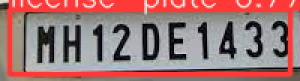

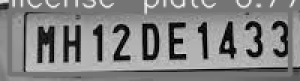

In [12]:
image= imutils.resize(x[0]['im'],width=300)
cv2_imshow(image)
gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [13]:
reader = easyocr.Reader(['en'])

result=reader.readtext(gray_image)

print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[71, 0], [101, 0], [101, 11], [71, 11]], 'Td', 0.015358717562040878), ([[143, 0], [191, 0], [191, 13], [143, 13]], 'e', 0.05753049554738632), ([[26, 9], [299, 9], [299, 73], [26, 73]], 'MH1Z DE4433', 0.3592112768189787)]


In [14]:
result[-1][-2]

'MH1Z DE4433'

In [15]:
string=(pytesseract.image_to_string(gray_image))

print(string)

‘JMH12DE 1433

